### TAMO Stock Price And Volume Distribution

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

#### Cleaning the data

In [128]:
# Reading the data

tamo = pd.read_csv('TAMO.csv')
tamo.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/15/2023,666.15,668.00,677.65,654.20,10.63M,-0.14%
1,10/08/2023,667.10,620.80,669.00,613.70,57.86M,0.0717
2,10/01/2023,622.45,632.60,632.65,608.30,30.32M,-1.23%
3,09/24/2023,630.20,623.85,633.00,612.25,34.36M,0.0157
4,09/17/2023,620.45,635.90,647.00,619.00,38.71M,-2.18%


In [129]:
# Dropping Columns

# For our analysis, we won't be needing the open,high and low prices. Morever, we will drop the 'Change%' column as some of the data are in 
# decimal form. Insteading of writing the code to fix the values, the price changes can be re-calculated from the price data

tamo.drop(columns=[ 'Open', 'High', 'Low','Change %'], inplace= True)
tamo.head()

,Date,Price,Vol.
0,10/15/2023,666.15,10.63M
1,10/08/2023,667.10,57.86M
2,10/01/2023,622.45,30.32M
3,09/24/2023,630.20,34.36M
4,09/17/2023,620.45,38.71M


In [130]:
# Converting the 'Vol.' column to float values


def clean_volume(vol):
    if 'M' in str(vol):
        vol = vol.replace('M', '')
        vol = float(vol)
        return vol
    if 'B' in str(vol):
        vol = vol.replace('B','')
        vol = float(vol) * 1000
        return vol

tamo['Vol.'] = tamo['Vol.'].apply(clean_volume)
tamo.head()

,Date,Price,Vol.
0,10/15/2023,666.15,10.63
1,10/08/2023,667.10,57.86
2,10/01/2023,622.45,30.32
3,09/24/2023,630.20,34.36
4,09/17/2023,620.45,38.71


In [131]:
# Calculating the Volume and Price Changes

# Price Changes
tamo['price_change'] = tamo['Price'].shift(1)/tamo['Price'] - 1
tamo['price_change'] = tamo['price_change'].shift(-1)

# Volume Changes
tamo['volume_change'] = tamo['Vol.'].shift(1)/tamo['Vol.'] - 1
tamo['volume_change'] = tamo['volume_change'].shift(-1)

tamo.head()

,Date,Price,Vol.,price_change,volume_change
0,10/15/2023,666.15,10.63,-0.001424,-0.816281
1,10/08/2023,667.10,57.86,0.071733,0.908311
2,10/01/2023,622.45,30.32,-0.012298,-0.117579
3,09/24/2023,630.20,34.36,0.015714,-0.112374
4,09/17/2023,620.45,38.71,-0.021758,-0.268933


In [132]:
# Sorting the Values in Ascending Order

tamo = tamo.iloc[::-1]

tamo.head()

,Date,Price,Vol.,price_change,volume_change
1043,10/19/2003,72.03,227.53,NaN,NaN
1042,10/26/2003,71.75,300.28,-0.003887,0.319738
1041,11/02/2003,71.38,220.84,-0.005157,-0.264553
1040,11/09/2003,69.99,144.62,-0.019473,-0.345137
1039,11/16/2003,74.07,194.82,0.058294,0.347117


In [136]:
# Replacing nan values

tamo.fillna(0)

,Date,Price,Vol.,price_change,volume_change
1043,10/19/2003,72.03,227.53,0.000000,0.000000
1042,10/26/2003,71.75,300.28,-0.003887,0.319738
1041,11/02/2003,71.38,220.84,-0.005157,-0.264553
1040,11/09/2003,69.99,144.62,-0.019473,-0.345137
1039,11/16/2003,74.07,194.82,0.058294,0.347117
...,...,...,...,...,...
4,09/17/2023,620.45,38.71,-0.021758,-0.268933
3,09/24/2023,630.20,34.36,0.015714,-0.112374
2,10/01/2023,622.45,30.32,-0.012298,-0.117579
1,10/08/2023,667.10,57.86,0.071733,0.908311


In [137]:
# Convert Date to Datetime Object

tamo['Date'] = pd.to_datetime(tamo['Date'])

### Analysis:

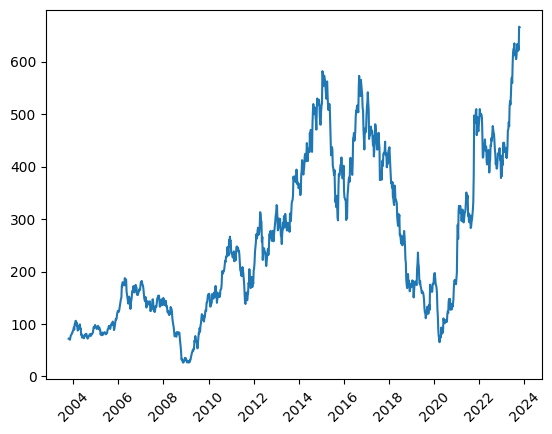

In [150]:
# TAMO Price Trend in the last 20 years

plt.plot(tamo['Date'], tamo['Price'])

years = mdates.YearLocator(2)
years_fmt = mdates.DateFormatter('%Y')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
plt.xticks(rotation=45)
plt.show()

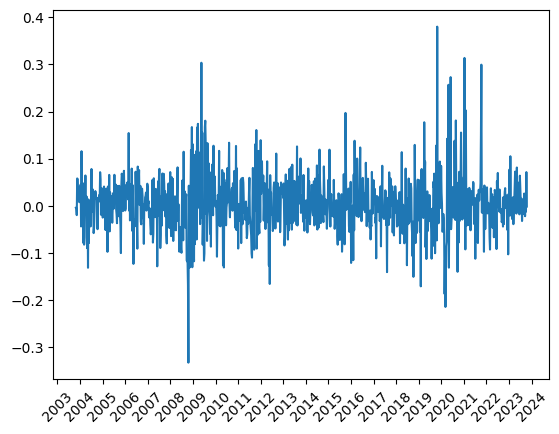

In [155]:
# Plotting Price Changes (Volatility)

plt.plot(tamo['Date'], tamo['price_change'])

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
plt.xticks(rotation=45)
plt.show()

<Axes: >

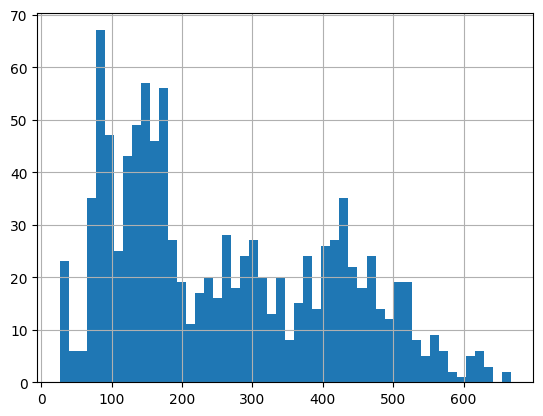

In [154]:
# Distribution Of Prices

tamo['Price'].hist(bins=50)

# Typically, stock prices are not used to due to varios reasons like seasonality.  
# We can also see that the distribution of TAMO's prices is positively skewed.
# Hence we will graph the distribution of the returns.

<Axes: >

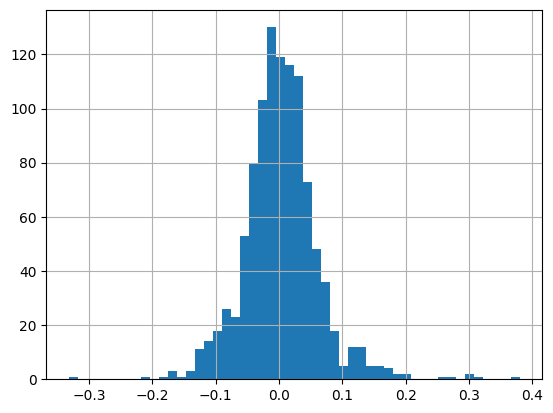

In [156]:
# Distribution of Returns

tamo['price_change'].hist(bins=50)

# We can see that the distribution of returns is more 'normal.' We can normalize it even further using the log returns

<Axes: >

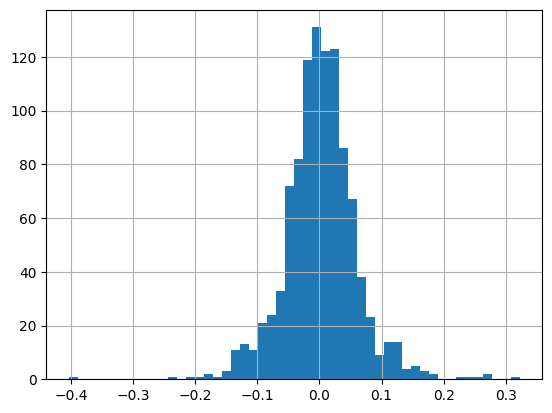

In [159]:
# Distribution of log returns (continously compounded returns)

log_returns = np.log(tamo['price_change'] + 1)
log_returns.hist(bins=50)

<function matplotlib.pyplot.show(close=None, block=None)>

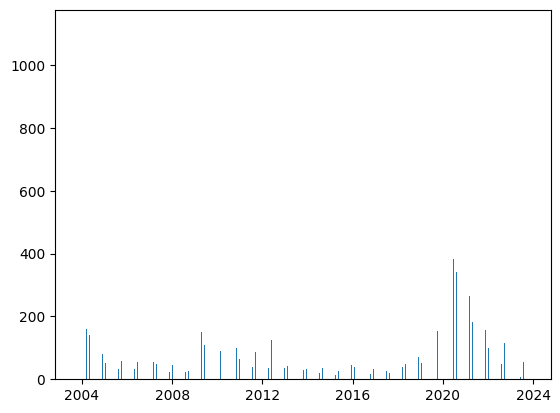

In [166]:
plt.bar(tamo['Date'], tamo['Vol.'])
plt.show

<Axes: >

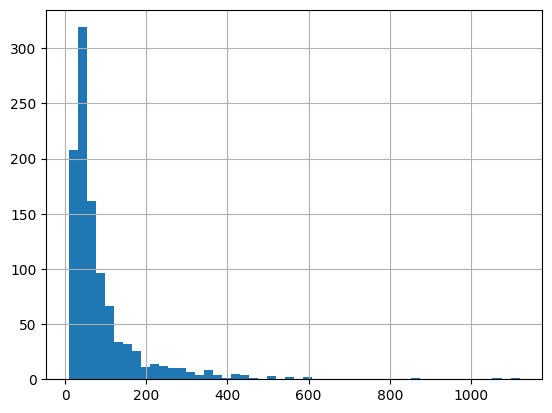

In [162]:
# Distribution of Volume 

tamo['Vol.'].hist(bins=50)

<Axes: >

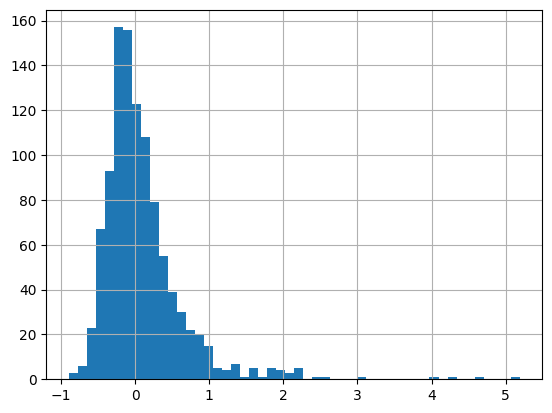

In [163]:
# Distribution of Volume changes

tamo['volume_change'].hist(bins=50)